# 案例背景

X银行营销数据集，是一个二分类任务。数据共有21个自变量属性，1个目标变量，目标变量代表的任务为预测客户是否会购买银行的定期存款业务。

设计内容是在训练集bank.csv（41188条）上，利用numpy、pandas、matplotlib、sklearn等包，整理数据完成训练，将训练好的模型在预测集bank_prediction.csv（4119条）上做预测。

# 数据加载/概览

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['KaiTi']

In [89]:
data_train = pd.read_csv('bank.csv')
data_train = data_train.iloc[:,1:]
data_train.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,label
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [90]:
data_train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [91]:
data_train.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,label
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


# 缺失值(Unknown值)处理

## 列的处理

In [92]:
# unknown值
for col in data_train.columns:
    print(col + '--unknown值: ' + str(data_train[data_train[col] == 'unknown'].shape[0]))
    
# 删除unknown大于20%的列
for col in data_train.columns:
    num = data_train[data_train[col] == 'unknown'].shape[0]
    if num/data_train.shape[0] > 0.2:
        print('删去了' + col)
        data_train.drop(columns=col,inplace=True)

age--unknown值: 0
job--unknown值: 330
marital--unknown值: 80
education--unknown值: 1731
default--unknown值: 8597
housing--unknown值: 990
loan--unknown值: 990
contact--unknown值: 0
month--unknown值: 0
day_of_week--unknown值: 0
duration--unknown值: 0
campaign--unknown值: 0
pdays--unknown值: 0
previous--unknown值: 0
poutcome--unknown值: 0
emp.var.rate--unknown值: 0
cons.price.idx--unknown值: 0
cons.conf.idx--unknown值: 0
euribor3m--unknown值: 0
nr.employed--unknown值: 0
label--unknown值: 0
删去了default


## 行的处理

In [93]:
# 替换unknown为每列的众数
for col in data_train.columns.tolist():
    if (type(data_train[col][0])) is str:
        if ('unknown' in data_train[col].tolist()):
            col_mode = data_train[col].mode()[0]
            data_train[col].replace('unknown', col_mode, inplace=True)

In [94]:
# 删除unknown行
# for index, row in data_train.iterrows():
#         if ('unknown' in row.values):
#             data_train.drop([index], inplace=True)

# 数据可视化分析与数据处理

##  Object数据与label

In [95]:
def pie_plot(data,col,title,figsize = (20,20),height = 4,width = 4):
    plt.figure(figsize = figsize)
    plt.suptitle(title)
    row = data[col].unique().tolist()
    length = len(row)
    for i in range(length):
        plt.subplot(width,height,i+1).set_title(row[i])
        plt.pie( data[data[col] == row[i]].label.value_counts(),
                 labels = ['不购买','购买'],
                explode = [0,0.2],
                colors = ['#66CCCC','#FF6666'],
                autopct = '%.2f%%'  
               )
plt.show()

In [96]:
import warnings
warnings.filterwarnings('ignore')  # 不发出警告

### 房贷状况

<AxesSubplot:xlabel='housing'>

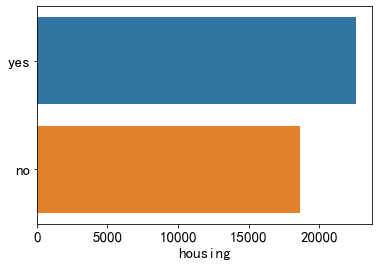

In [97]:
sns.barplot(data_train["housing"].value_counts()[:20],
            data_train["housing"].value_counts().keys()[:20])

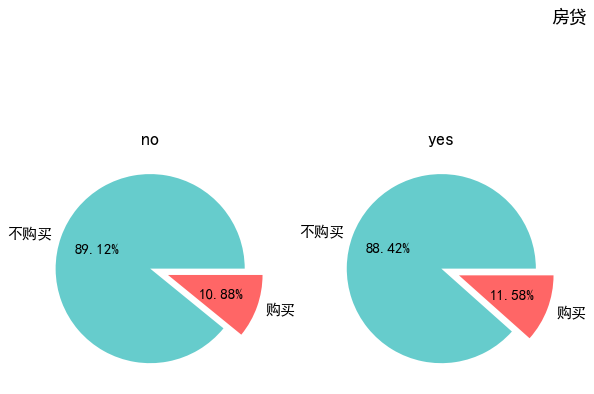

In [98]:
pie_plot(data_train,'housing','房贷')

### 个人贷款状况

<AxesSubplot:xlabel='loan'>

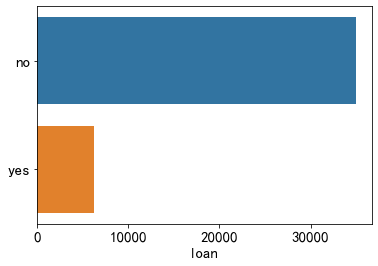

In [99]:
sns.barplot(data_train["loan"].value_counts()[:20],
            data_train["loan"].value_counts().keys()[:20])

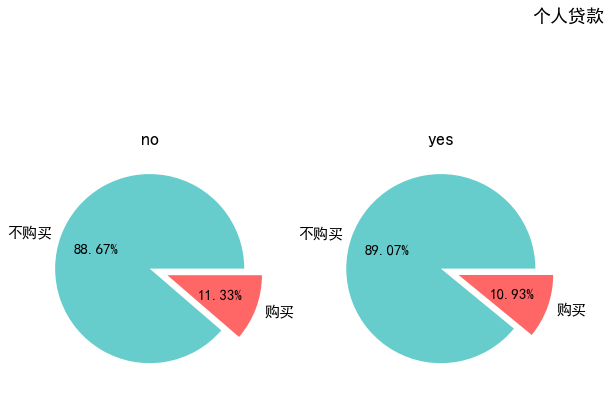

In [100]:
pie_plot(data_train,'loan','个人贷款')

### 上次联系时为周几

<AxesSubplot:xlabel='day_of_week'>

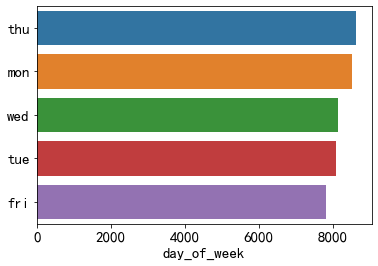

In [101]:
sns.barplot(data_train["day_of_week"].value_counts()[:20],
            data_train["day_of_week"].value_counts().keys()[:20])

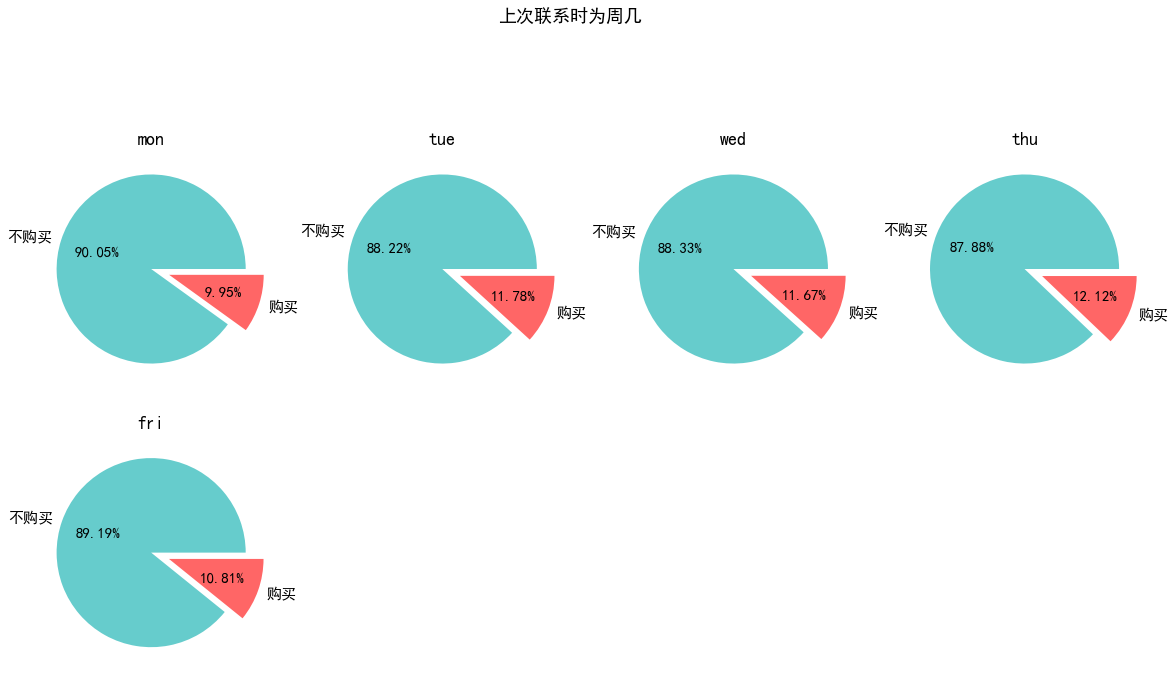

In [102]:
pie_plot(data_train,'day_of_week','上次联系时为周几')

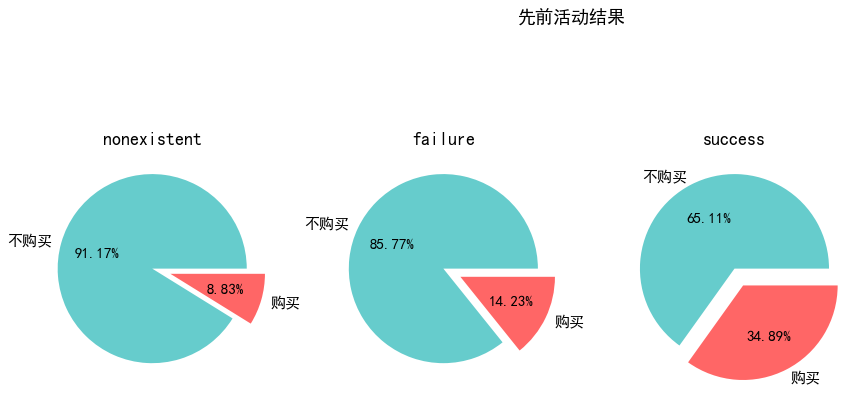

In [103]:
pie_plot(data_train,'poutcome','先前活动结果')

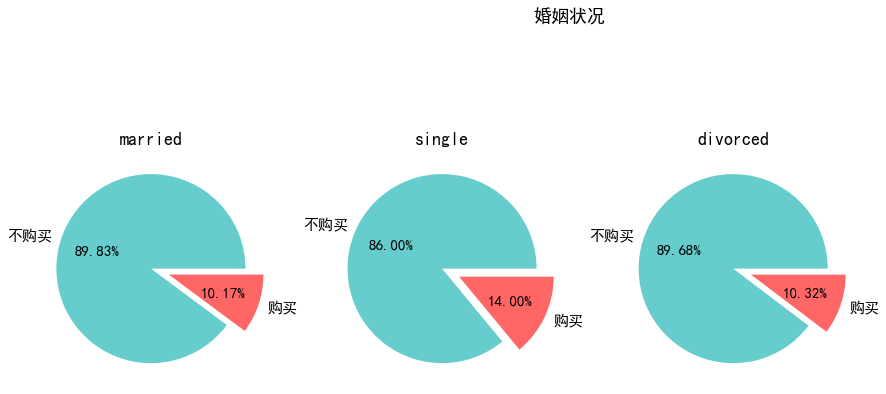

In [104]:
pie_plot(data_train,'marital','婚姻状况')

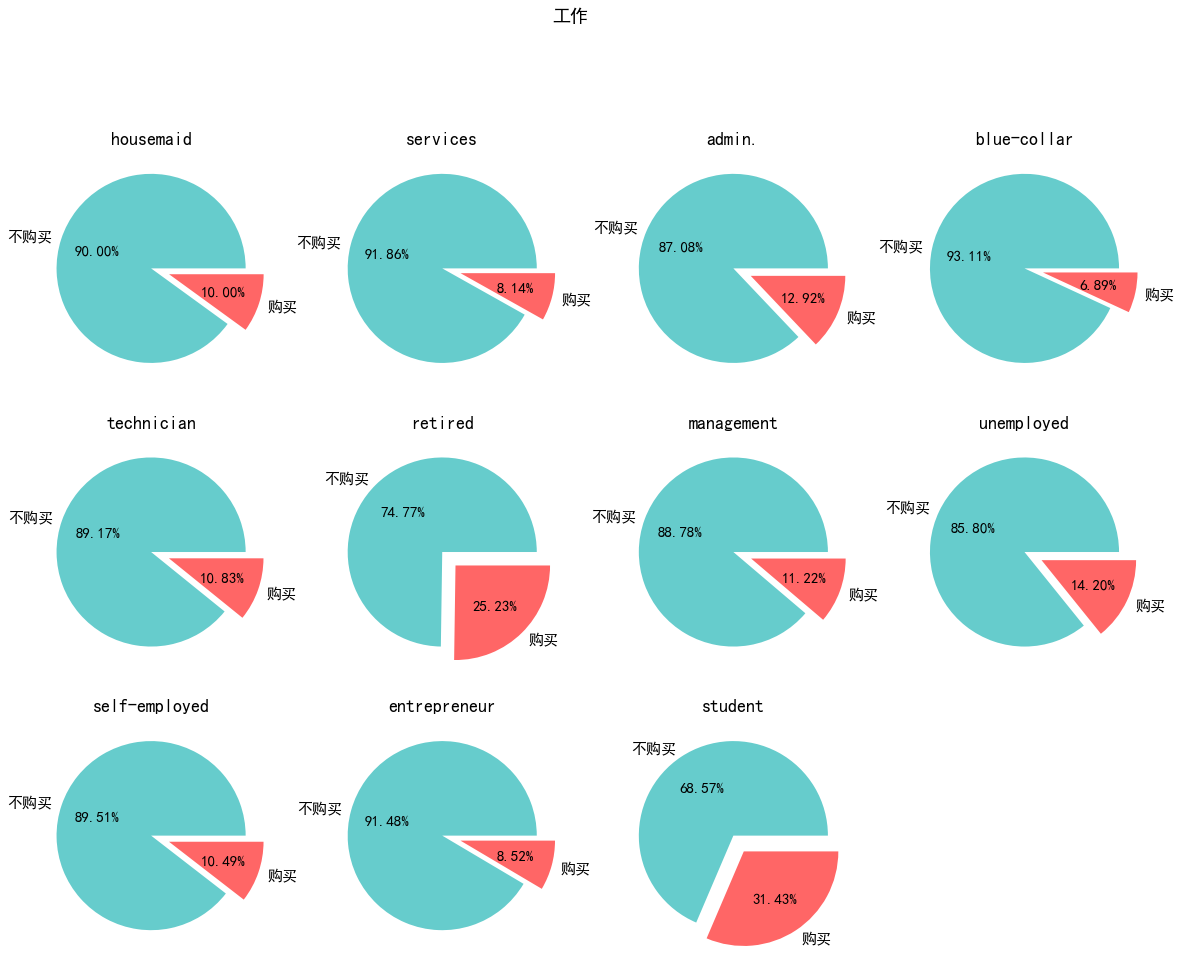

In [105]:
pie_plot(data_train,'job','工作')

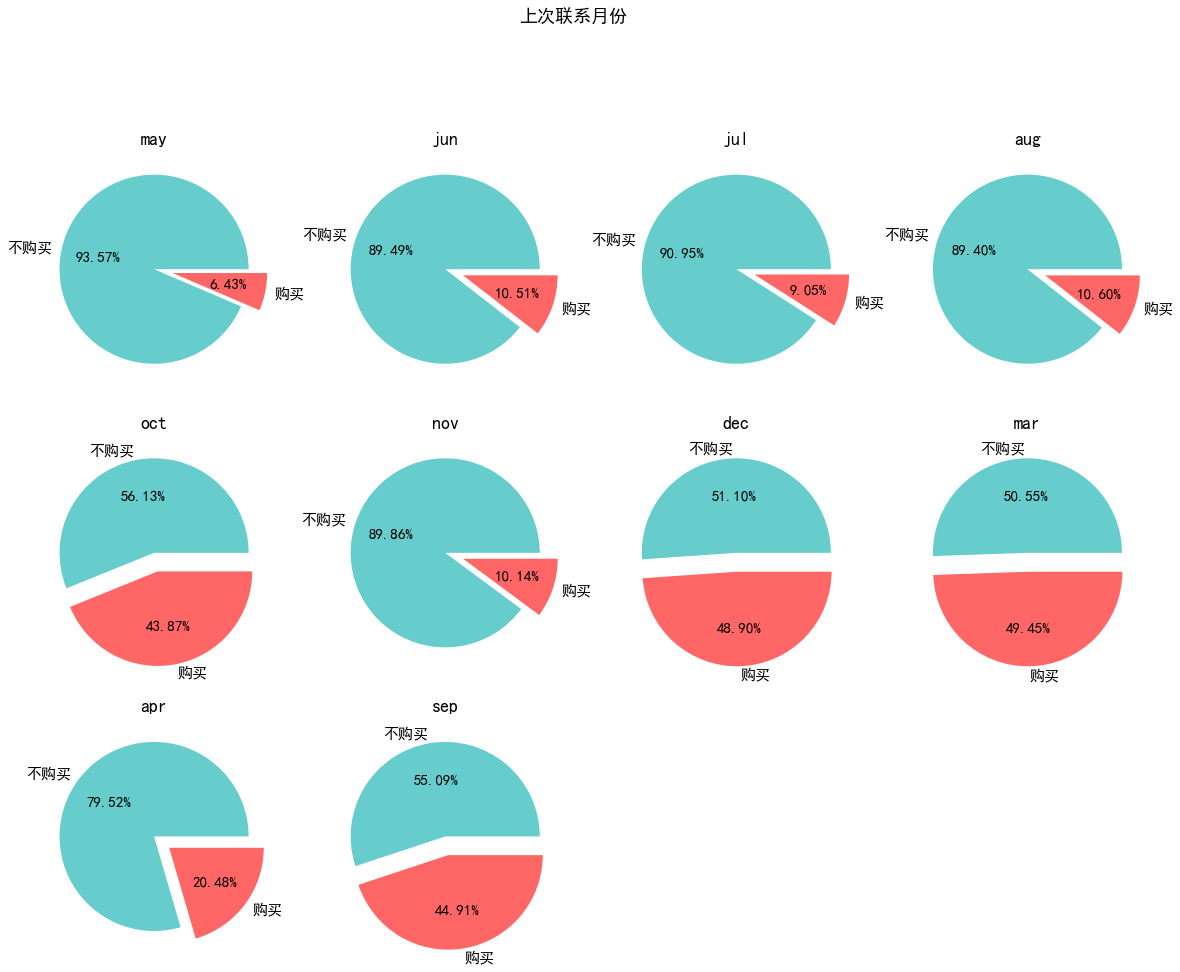

In [106]:
pie_plot(data_train,'month','上次联系月份')

+ housing loan day_of_week可能对于结果没有明显影响,其它因素对结果有一定影响

## 数值型数据与label（热力图）

In [107]:
data_train.replace(['yes', 'no'], [1, 0], True)

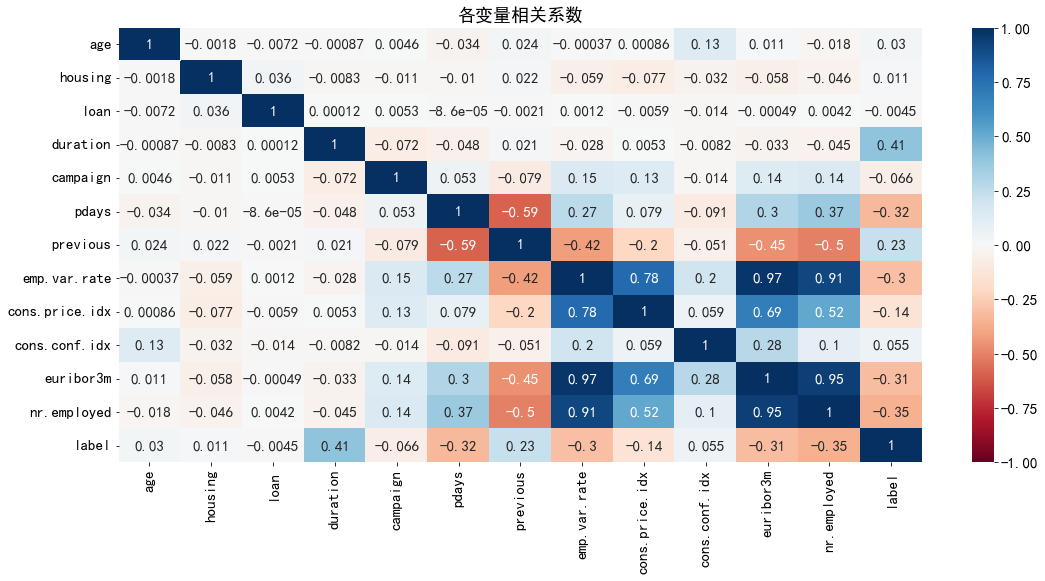

In [108]:
font = {'family':'SimHei','size':'15'}
plt.rc('font',**font)
plt.rc('axes',unicode_minus='False')
plt.figure(figsize = (18,8))
corr_matrix = data_train.corr()
sns.heatmap(corr_matrix, cmap='RdBu', annot=True, vmin=-1, vmax=1)
plt.title('各变量相关系数')
plt.show()

+ emp.var.rate（季度就业变化率） 与euribor3m（三月期利率）相关性为 0.97
+ emp.var.tate（季度就业变化率） 与nr.employed（员工人数）相关性为 0.91
+ nr.employed（员工人数）与enribor3m（三月期利率）相关性为0.95
+ 同时三者对label具有较大的影响
+ 可以考虑删除其中一个或者两个

+ duration(上次联系的通话时长) pdays(距离上次联系顾客的天数) previous(先前联系顾客的次数)对label影响较大

+ 结合前面分析,loan应该删除

+ 较低的数值还有campaign(本次营销活动中与客户联系的次数) cons.conf.idx(月度消费者信心指数)

## 连续型数据-异常值分析

In [109]:
def dist_plot(data, col, title):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=data, ax=ax[0],color = "#1D8EF5")
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=data, ax=ax[1],color = "#33AAFF", edgecolor="#1D1EA2")
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(data[col].mean(), color='darkgreen', linestyle='--',linewidth=2.2, label='mean=' + str(np.round(data[col].mean(),1)) )
    plt.axvline(data[col].median(), color='red', linestyle='--',linewidth=2.2, label='median='+ str(np.round(data[col].median(),1)) )
    plt.axvline(data[col].mode()[0], color='purple', linestyle='--',linewidth=2.2, label='mode='+ str(np.round(data[col].mode()[0],1)) )
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

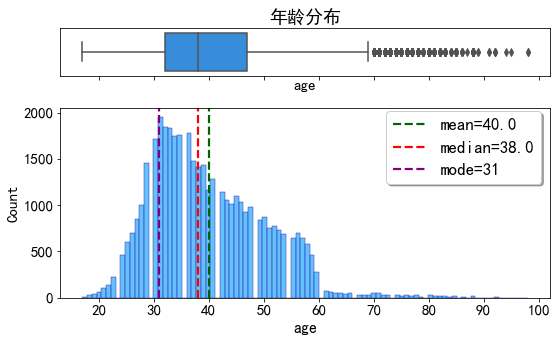

In [110]:
dist_plot(data_train,'age','年龄分布')

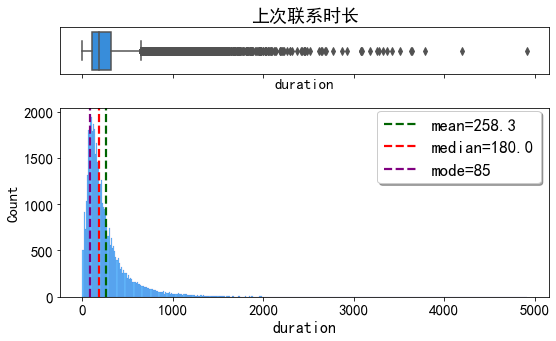

In [111]:
dist_plot(data_train,'duration','上次联系时长')

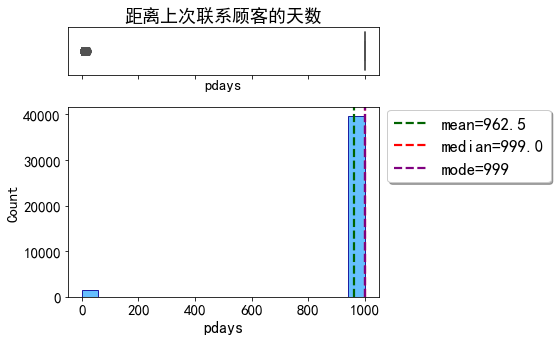

In [112]:
dist_plot(data_train,'pdays','距离上次联系顾客的天数')

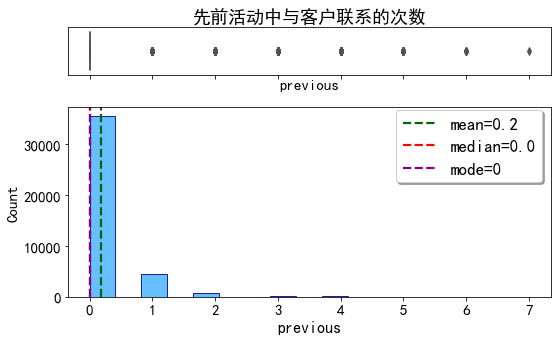

In [113]:
dist_plot(data_train,'previous','先前活动中与客户联系的次数')

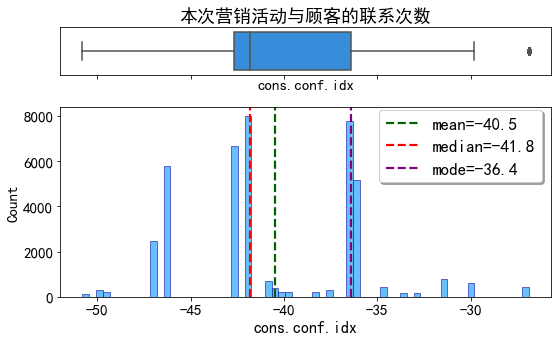

In [114]:
dist_plot(data_train,'cons.conf.idx','本次营销活动与顾客的联系次数')

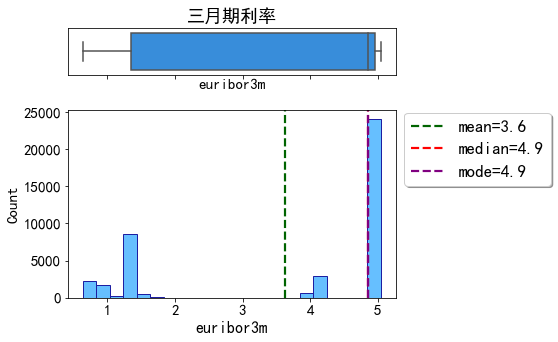

In [115]:
dist_plot(data_train,'euribor3m','三月期利率')

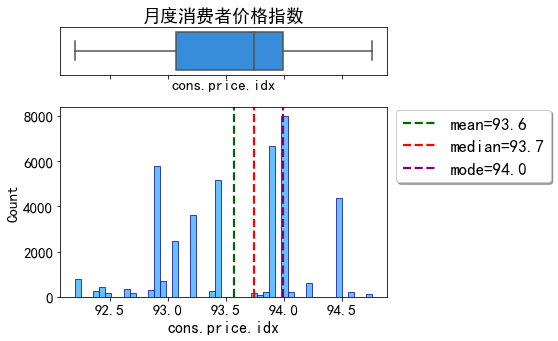

In [116]:
dist_plot(data_train,'cons.price.idx','月度消费者价格指数')

## 数据处理

### 删除列-数值型

In [117]:
# 经过饼状图和热力图分析，与label关系性不高
# data_train.drop(columns = ['loan'],inplace=True)
# emp.var.rate和euribor3m和nr.employed三者高度线性相关
data_train.drop(columns = ['nr.employed','emp.var.rate'])
# 经过饼状图分析与热力图分析，与label关系性不高
# data_train.drop(columns = ['housing'],inplace=True)
# campaign经过热力图分析，与label关系性不高
data_train.drop(columns = ['campaign'])

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,label
0,56,housemaid,married,basic.4y,0,0,telephone,may,mon,261,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,0,0,telephone,may,mon,149,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,1,0,telephone,may,mon,226,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,telephone,may,mon,151,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,1,telephone,may,mon,307,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,1,0,cellular,nov,fri,334,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,0,0,cellular,nov,fri,383,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,1,0,cellular,nov,fri,189,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,0,0,cellular,nov,fri,442,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


### 删除列——object类型

In [118]:
# 经过饼状图分析，与label关系性不高
# data_train.drop(columns = ['day_of_week'],inplace=True)

### 二元处理

In [119]:
# data_train['pdays'] = data_train.pdays.apply(lambda x : 1 if x == 999 else 0)

# 编码

In [120]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
# from category_encoders import LeaveOneOutEncoder

## 二分变量编码

In [121]:
# contact
data_train.replace(['cellular', 'telephone'], [1, 0], True)

## 序数编码

In [122]:
# education
edu_map = {"illiterate": 0, "basic.4y": 1, "basic.6y": 2, "basic.9y": 3, "high.school": 4, "professional.course": 5, "university.degree": 6}
data_train['education'] = data_train.education.map(edu_map)

In [123]:
# month
# mon_map = {'jan': 1, 'feb': 2, 'mar': 3, 'apr':4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct':10, 'nov': 11, 'dec': 12}
mon_map = {'mar': 0, 'apr':1, 'may': 2, 'jun': 3, 'jul': 4, 'aug': 5, 'sep': 6, 'oct':7, 'nov': 8, 'dec': 9}
data_train['month'] = data_train.month.map(mon_map)

In [124]:
# day_of_week
week_map = {'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4}
data_train['day_of_week'] = data_train.day_of_week.map(week_map)

In [125]:
# job
joblist = ["admin.", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed"]
jobvalue = [i for i in range(0, len(joblist))]
data_train['job'].replace(joblist, jobvalue, True)

In [126]:
# marital
# maritallist = ["divorced", "married", "single"]
# maritalvalue = [i for i in range(0, len(maritallist))]
# data_train['marital'].replace(maritallist, maritalvalue, True)

In [127]:
# poutcome
# poutlist = ['nonexistent','failure','success']
# poutvalue = [i for i in range(0, len(poutlist))]
# data_train['poutcome'].replace(poutlist, poutvalue, True)

## 独热码编码

In [128]:
# marital
ohc = OneHotEncoder()
ohe = ohc.fit_transform(data_train.marital.values.reshape(-1,1)).toarray()
maritalOneHot = pd.DataFrame(ohe,columns=["marital_" + str(ohc.categories_[0][i]) for i in range(len(ohc.categories_[0]))])
data_train.drop(columns='marital', inplace=True)
data_train = pd.concat([data_train,maritalOneHot],axis=1)

In [129]:
# poutcome
ohc = OneHotEncoder()
ohe = ohc.fit_transform(data_train.poutcome.values.reshape(-1,1)).toarray()
poutOneHot= pd.DataFrame(ohe,columns=["poutcome_" + str(ohc.categories_[0][i]) for i in range(len(ohc.categories_[0]))])
data_train.drop(columns='poutcome', inplace=True)
data_train = pd.concat([data_train,poutOneHot],axis=1)

In [130]:
data_train.columns

Index(['age', 'job', 'education', 'housing', 'loan', 'contact', 'month',
       'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'label', 'marital_divorced', 'marital_married',
       'marital_single', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

# 数据标准化

In [131]:
# cols = data_train.columns

In [132]:
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# data_train = ss.fit_transform(data_train)

In [133]:
# data_train = pd.DataFrame(data_train)
# data_train.columns = cols

## 数据拆分：训练集（0.95）+测试集（0.05）
注意：

（1）必须设置固定的随机种子：train_test_split( train_size = 0.70, random_state = 1234)
一定设置随机种子，保证每次运行的数据是同一次抽样数据，random_state = 1234（1234可以是任意数值）

（2）训练集（0.7）+测试集（0.3）可以是其他比例。

In [134]:
y = data_train['label']
data_train.drop(columns='label',inplace=True)

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train.loc[:,:], 
                                                    y, train_size = 0.95, 
                                                    random_state = 2021)
print('训练数据集共有%d条观测' %X_train.shape[0])
print('测试数据集共有%d条观测' %X_test.shape[0])

训练数据集共有39128条观测
测试数据集共有2060条观测


# 数据建模

In [136]:
from sklearn.neighbors import KNeighborsClassifier
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn import metrics
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [137]:
xgb.set_config(verbosity=0)

## XGBoost模型

### 使用网格搜索算法调参

+ learning_rate: 学习率,通过减少每一步的权重，可以提高模型的鲁棒性。典型值为0.01-0.2
+ min_child_weight: 决定最小叶子节点样本权重和。这个参数用于避免过拟合。当它的值较大时，可以避免模型学习到局部的特殊样本。但是如果这个值过高，会导致欠拟合。这个参数需要使用CV来调整。
+ max_depth: 树的深度，值越大，越容易过拟合；值越小，越容易欠拟合。默认值为6，典型值3-10
+ gmma: 在节点分裂时，只有分裂后损失函数的值下降了，才会分裂这个节点。Gamma指定了节点分裂所需的最小损失函数下降值。这个参数的值越大，算法越保守。这个参数的值和损失函数息息相关，所以是需要调整的
+ subsample: 训练每棵树时，使用的数据占全部训练集的比例导致过拟合。默认值为1，典型值为0.5-1
+ colsample_bytree: 训练每棵树时，使用的特征占全部特征的比例，防止过拟合。默认值为1，典型值为0.5-1。

In [138]:
# (1) 设置模型参数
def parameters():
    learning_rate = [0.07]  
    n_estimators = [100]
    min_child_weight = [1]                 
    max_depth =[6]   
    gamma=[0]                      
    subsample = [0.7]            
    colsample_bytree =[1]                  
    parameters = {
        'learning_rate': learning_rate,
        'n_estimators':n_estimators,
        'min_child_weight':min_child_weight,
        'max_depth':max_depth,
        'gamma':gamma,
        'subsample':subsample,
         'colsample_bytree':colsample_bytree
    }
    return parameters

In [139]:
# (2) 网格搜索算法
def gridsearch(x_train, y_train,x_test,y_test,parameters):
    model=XGBClassifier(
                        scale_pos_weight=1,
                        early_stopping_rounds=20,
                        seed=2022)
    clf = GridSearchCV(model, parameters, cv=5, scoring='f1',verbose=0)
    train = clf.fit(x_train, y_train)
    print("测试集f1_score值:{:.2f}".format(train.score(x_test,y_test)))
    print('参数的最佳取值：{0}'.format(train.best_params_))
    print('最佳模型得分:{0}'.format(train.best_score_))

In [140]:
gridsearch(X_train,y_train,X_test,y_test,parameters())

测试集f1_score值:0.60
参数的最佳取值：{'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.07, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.7}
最佳模型得分:0.5968568009847826


### 训练模型

In [141]:
eval_set = [(X_train, y_train), (X_test, y_test)]

In [142]:
xgb = XGBClassifier(learning_rate=1.6,
                    objective='binary:logistic',
                   )
xgb.fit(X_train, y_train.astype('int32'))
print(xgb)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=1.6, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


### 训练集

In [143]:
print('XGBoost模型在训练集上的准确率：%f' %xgb.score(X_train,y_train.astype('int32')))

XGBoost模型在训练集上的准确率：0.996933


In [144]:
xgb_pred_X_train = xgb.predict(X_train)
print(pd.crosstab(xgb_pred_X_train, y_train, margins = True))

f1_xgb_train = metrics.f1_score(xgb_pred_X_train, y_train)
print('XGBoost模型在训练集上的f1_score：%f' %f1_xgb_train)

label      0     1    All
row_0                    
0      34670    84  34754
1         36  4338   4374
All    34706  4422  39128
XGBoost模型在训练集上的f1_score：0.986357


### 测试集

In [145]:
print('XGBoost模型在测试集上的准确率：%f' %xgb.score(X_test,y_test))

XGBoost模型在测试集上的准确率：0.904369


In [146]:
xgb_pred_X_test = xgb.predict(X_test)
print(pd.crosstab(xgb_pred_X_test, y_test, margins = True))

f1_xgb_test = metrics.f1_score(xgb_pred_X_test, y_test)
print('XGBoost模型在测试集上的f1_score：%f' %f1_xgb_test)

label     0    1   All
row_0                 
0      1741   96  1837
1       101  122   223
All    1842  218  2060
XGBoost模型在测试集上的f1_score：0.553288


## Catboost模型

In [147]:
cat = CatBoostClassifier(verbose=0)
cat.fit(X_train, y_train.astype('int32'))

### 训练集

In [148]:
print('XGBoost模型在训练集上的准确率：%f' %cat.score(X_train,y_train.astype('int32')))

XGBoost模型在训练集上的准确率：0.949039


In [149]:
cat_pred_X_train = cat.predict(X_train)
print(pd.crosstab(cat_pred_X_train, y_train, margins = True))

f1_cat_train = metrics.f1_score(cat_pred_X_train, y_train)
print('XGBoost模型在训练集上的f1_score：%f' %f1_cat_train)

label      0     1    All
row_0                    
0      34102  1390  35492
1        604  3032   3636
All    34706  4422  39128
XGBoost模型在训练集上的f1_score：0.752544


### 测试集

In [150]:
print('XGBoost模型在测试集上的准确率：%f' %cat.score(X_test,y_test))

XGBoost模型在测试集上的准确率：0.917476


In [151]:
cat_pred_X_test = cat.predict(X_test)
print(pd.crosstab(cat_pred_X_test, y_test, margins = True))

f1_cat_test = metrics.f1_score(cat_pred_X_test, y_test)
print('XGBoost模型在测试集上的f1_score：%f' %f1_cat_test)

label     0    1   All
row_0                 
0      1758   86  1844
1        84  132   216
All    1842  218  2060
XGBoost模型在测试集上的f1_score：0.608295


# 预测

## 载入预测集数据

In [152]:
bank_prediction = pd.read_csv(r'bank_prediction.csv')
bank_prediction.head(3)

,id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,...,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,1,39,services,single,high.school,no,no,no,telephone,may,...,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,2,25,services,married,high.school,no,yes,no,telephone,jun,...,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1


## unknown值

In [153]:
# 替换unknown为每列的众数
for col in bank_prediction.columns.tolist():
    if (type(bank_prediction[col][0])) is str:
        if ('unknown' in bank_prediction[col].tolist()):
            col_mode = bank_prediction[col].mode()[0]
            bank_prediction[col].replace('unknown', col_mode, inplace=True)

## 二元处理

In [154]:
# 二元处理
# bank_prediction['pdays'] = bank_prediction.pdays.apply(lambda x : 1 if x == 999 else 0)
bank_prediction.replace(['yes', 'no'], [1, 0], True)

## 删除列

In [155]:
bank_prediction.drop(columns=['id','default'],inplace=True)

In [156]:
# 经过饼状图和热力图分析，与label关系性不高
# bank_prediction.drop(columns = ['loan'],inplace=True)
# # emp.var.rate和euribor3m和nr.employed三者高度线性相关，避免过拟合删除一列
bank_prediction.drop(columns = ['nr.employed','emp.var.rate'])
# # 经过饼状图分析与热力图分析，与label关系性不高
# bank_prediction.drop(columns = ['housing'],inplace=True)
# # campaign经过热力图分析，与label关系性不高
bank_prediction.drop(columns = ['campaign'])

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,blue-collar,married,basic.9y,1,0,cellular,may,fri,487,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,39,services,single,high.school,0,0,telephone,may,fri,346,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25,services,married,high.school,1,0,telephone,jun,wed,227,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,38,services,married,basic.9y,1,0,telephone,jun,fri,17,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,47,admin.,married,university.degree,1,0,cellular,nov,mon,58,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,1,1,cellular,jul,thu,53,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1
4115,39,admin.,married,high.school,1,0,telephone,jul,fri,219,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1
4116,27,student,single,high.school,0,0,cellular,may,mon,64,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1
4117,58,admin.,married,high.school,0,0,cellular,aug,fri,528,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1


In [157]:
# 经过饼状图分析，与label关系性不高
# bank_prediction.drop(columns = ['day_of_week'],inplace=True)

## 编码

### 二元变量编码

In [158]:
# contact
bank_prediction.replace(['cellular', 'telephone'], [1, 0], True)

### 序数编码

In [159]:
# education
edu_map = {"illiterate": 0, "basic.4y": 1, "basic.6y": 2, "basic.9y": 3, "high.school": 4, "professional.course": 5, "university.degree": 6}
bank_prediction['education'] = bank_prediction.education.map(edu_map)

In [160]:
# month
# mon_map = {'jan': 1, 'feb': 2, 'mar': 3, 'apr':4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct':10, 'nov': 11, 'dec': 12}
mon_map = {'mar': 0, 'apr':1, 'may': 2, 'jun': 3, 'jul': 4, 'aug': 5, 'sep': 6, 'oct':7, 'nov': 8, 'dec': 9}
bank_prediction['month'] = bank_prediction.month.map(mon_map)

In [161]:
# day_of_week
week_map = {'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4}
bank_prediction['day_of_week'] = bank_prediction.day_of_week.map(week_map)

In [162]:
# job
joblist = ["admin.", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed"]
jobvalue = [i for i in range(0, len(joblist))]
bank_prediction['job'].replace(joblist, jobvalue, True)

### 独热编码

In [163]:
# marital
ohc = OneHotEncoder()
ohe = ohc.fit_transform(bank_prediction.marital.values.reshape(-1,1)).toarray()
maritalOneHot = pd.DataFrame(ohe,columns=["marital_" + str(ohc.categories_[0][i]) for i in range(len(ohc.categories_[0]))])
bank_prediction.drop(columns='marital', inplace=True)
bank_prediction = pd.concat([bank_prediction,maritalOneHot],axis=1)

In [164]:
# poutcome
ohc = OneHotEncoder()
ohe = ohc.fit_transform(bank_prediction.poutcome.values.reshape(-1,1)).toarray()
poutOneHot= pd.DataFrame(ohe,columns=["poutcome_" + str(ohc.categories_[0][i]) for i in range(len(ohc.categories_[0]))])
bank_prediction.drop(columns='poutcome', inplace=True)
bank_prediction = pd.concat([bank_prediction,poutOneHot],axis=1)

## 加载训练好的模型
**注意**：仅修改模型名称（knn、gbdt）为自己训练好的模型名称，其余代码别改。

In [165]:
ids = pd.read_csv('./bank_prediction.csv')

### XGBoost模型

In [166]:
out_xgb = xgb.predict(bank_prediction)

In [167]:
result_xgb = pd.DataFrame(columns=['id','label_predicted'])
result_xgb['id'] = ids['id']
result_xgb['label_predicted']= pd.Series(out_xgb)

In [168]:
# 保存预测结果
result_xgb.to_csv('result_xgb.csv',index=0)

### Catboost

In [169]:
out_cat = cat.predict(bank_prediction)

In [170]:
result_cat = pd.DataFrame(columns=['id','label_predicted'])
result_cat['id'] = ids['id']
result_cat['label_predicted']= pd.Series(out_cat)

In [171]:
# 保存预测结果
result_cat.to_csv('result_cat.csv',index=0)

# 最终评分

## XGBoost模型

In [172]:
metric_mash_np2 = np.load('evaluate.npy')
metric_mash = pd.DataFrame(metric_mash_np2)
metric_mash.columns = ['id', 'label_real']


data_predicted = pd.read_csv('result_xgb.csv')  #

data = pd.merge(metric_mash, data_predicted, how='left', on='id')
accuracy = data.label_real[(data.label_real == data.label_predicted)].count() / len(data.label_real)
f1_score = metrics.f1_score(data.label_real, data.label_predicted)

print(pd.crosstab(data.label_predicted, data.label_real, margins=True))

print('-'*50)
print('在预测集上，你的f1_score值为：%.4f' % f1_score)

label_real          0    1   All
label_predicted                 
0                3655   13  3668
1                  13  438   451
All              3668  451  4119
--------------------------------------------------
在预测集上，你的f1_score值为：0.9712


## Catboost模型

In [173]:
metric_mash_np2 = np.load('evaluate.npy')
metric_mash = pd.DataFrame(metric_mash_np2)
metric_mash.columns = ['id', 'label_real']


data_predicted = pd.read_csv('result_cat.csv')  #

data = pd.merge(metric_mash, data_predicted, how='left', on='id')
accuracy = data.label_real[(data.label_real == data.label_predicted)].count() / len(data.label_real)
f1_score = metrics.f1_score(data.label_real, data.label_predicted)

print(pd.crosstab(data.label_predicted, data.label_real, margins=True))

print('-'*50)
print('在预测集上，你的f1_score值为：%.4f' % f1_score)

label_real          0    1   All
label_predicted                 
0                3596  144  3740
1                  72  307   379
All              3668  451  4119
--------------------------------------------------
在预测集上，你的f1_score值为：0.7398
